In [1]:
# evaluate RF

In [78]:
import pandas as pd
from graphviz import Digraph
from copy import deepcopy

import networkx as nx

In [90]:
def create_graph_from_dict(tree_dict, output_file=''):
    # draw a tree from child parent dictionary
    graph = Digraph('G', format='png')
    
    # node attributes
    graph.attr('node', 
               shape='circle',
               fixedsize='true', 
               width='0.35', 
               height='0.35',
               fontsize='8.75'
               )
    
    # edge attributes
    graph.attr('edge', 
               arrowsize='0.4',
               splines='false'
               )
    
    # convert dictionary, mapping child to parent, to edges
    edges = [(parent, child) for child, parent in tree_dict.items()]

    # add the edges to the graph
    for parent, child in edges:
        graph.edge(parent, child)

    return graph

def create_undirected_graph_from_dict(tree_dict):
    # add nodes/edges to graph, networkx object
    graph = nx.Graph(tree_dict)
    
    # get layout of nodes
    pos = nx.spring_layout(graph)
    
    nx.draw(graph, 
            pos, 
            with_labels=True, 
            node_size=500, 
            node_color='lightgrey', 
            font_family='Arial'
            )
    
    return graph

def create_undirected_graph(graph, pos):    
    # drawing function given graph and layout
    nx.draw(graph, 
            pos, 
            with_labels=True, 
            node_size=500, 
            node_color='lightgrey', 
            font_family='Arial'
            )
    
    return graph

In [91]:
OUT = '/Users/wuchh/Documents/DETOPT-P/sim_results/simNo_1-s_11-m_100-h_40-cna_0.2-cov_100_subsample_5.detopt.tsv'

GT = '/Users/wuchh/Documents/DETOPT-P/ground-truth/simNo_1-s_11-m_100-h_40-cna_0.2.tree.tsv'

In [92]:
assignments = pd.read_csv(OUT, sep='\t', header=None)
assignments.columns = ['mut','objective','node','CN','node_cn']

In [93]:
node_assignments = assignments.set_index('mut')['node'].to_dict()

In [94]:
node_assignments

{'mut0': 0,
 'mut1': 0,
 'mut10': 1,
 'mut21': 3,
 'mut26': 2,
 'mut29': 3,
 'mut36': 4,
 'mut40': 4,
 'mut43': 4,
 'mut49': 5,
 'mut5': 0,
 'mut60': 5,
 'mut64': 5,
 'mut66': 5,
 'mut69': 6,
 'mut75': 6,
 'mut8': 1,
 'mut81': 8,
 'mut87': 9,
 'mut93': 9}

In [95]:
ground_truth = pd.read_csv(GT, sep='\t')

In [96]:
ground_truth_assignments = {}

for _, row in ground_truth.iterrows():

    if row['NODE_ID'] == 'ROOT': continue
    else:
        snvs = row['SNV_IDS'].split(',')

        for snv in snvs:
            ground_truth_assignments[snv] = row['NODE_ID'] 

In [97]:
incorrect_assignments = {}

for mut, assignment in node_assignments.items():

    node_mutations = ground_truth[ground_truth['NODE_ID'] == str(assignment)]['SNV_IDS']
    
    if mut not in node_mutations.tolist()[0].split(','):
        print(mut, assignment, ground_truth_assignments[mut])

        incorrect_assignments[mut] = (str(assignment), ground_truth_assignments[mut])

mut21 3 2
mut49 5 4


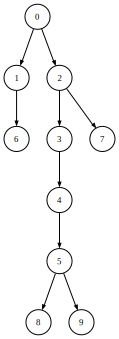

In [98]:
tree_dict = ground_truth.set_index('NODE_ID')['PARENT_ID'].to_dict()
del tree_dict['ROOT']
del tree_dict['0']
graph = create_graph_from_dict(tree_dict, '')

graph

In [99]:
G_renamed = nx.relabel_nodes(graph, {'2':'3', '3':'2'})

pos = nx.spring_layout(G_renamed)
full = create_undirected_graph(G_renamed, pos)

AttributeError: 'Digraph' object has no attribute 'add_nodes_from'

In [88]:
tree_dict

{'1': '0',
 '2': '0',
 '3': '2',
 '4': '3',
 '5': '4',
 '6': '1',
 '7': '2',
 '8': '5',
 '9': '5'}

In [89]:
def swap(tree_dict, a, b):

    if tree_dict[a] == b:
        tree_dict[a] = 1


    # Assuming One isn't the parent of the other
    a_parent = tree_dict[a]
    b_parent = tree_dict[b]

    # Swap the parents
    tree_dict[a] = b_parent
    tree_dict[b] = a_parent

    # Go over all the nodes and if it's a parent of one set it to the other
    for k, v in tree_dict.items():
        if v == a:
            tree_dict[k] = b
        elif v == b:
            tree_dict[k] = a

    return tree_dict



In [84]:
for mut in incorrect_assignments.keys():

    print(mut)

    inferred, true = incorrect_assignments[mut]

    inferred
    break

mut21


In [87]:
hold = tree_dict[inferred]

tree_dict[inferred] = tree_dict[true]

'0'